### Assignment 6 - Machine Learning, LOGITBOOST

### By: Sourita Nag


In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,roc_curve
import time
from IPython.display import display, clear_output

In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [24]:
##Implementing the logit boost
def LOGITBOOST(K,Y_train,Y_test):
    N = data_train.shape[0]
    h_x = np.zeros((N))
    #K = k
    B = np.zeros((K, 2))
    Beta = np.zeros((X_train.shape[1],1))
    training_loss = []
    t_loss = []
    Y_train  = Y_train.reshape(-1)
    Y_i = (2*Y_train - 1).reshape(-1)

    for k in range(K):
        P = sigmoid(h_x)
        W = P * (1 - P)
        W = W.reshape(-1)
        Z = np.where(Y_train == 1,1/P,-1/(1-P))
        Z = np.clip(Z, -4, 4)
        Z = Z.reshape(-1)

        Loss = []
        H_temp = np.zeros((N, data_train.shape[1]))
        betas1 = []
        betas0 = []


        for i in range(data_train.shape[1]):
            X = data_train[:, i].reshape(-1)
            #X_bar = np.sum(X*W) / np.sum(W)
            #Z_bar = np.sum(W * Z) / np.sum(W)
            #b1 = np.sum((X - X_bar)*W * (Z - Z_bar)) / np.sum(((X - X_bar) ** 2)*W)
            model=LinearRegression().fit(X.reshape(-1,1),Z.reshape(-1,1),sample_weight=W)
            #res_wls = model.fit()
            b1=model.coef_[0][0]
            betas1.append(b1)
            #b0 = Z_bar - b1 * X_bar
            b0 = model.intercept_[0]
            betas0.append(b0)
            H_temp[:, i] = h_x.reshape(-1) + (b0 + b1*X).reshape(-1) #a matrix of order Nx1
            ls = np.mean(np.log(1 + np.exp(-(H_temp[:, i]*Y_i))))
            Loss.append(ls)


        idx = np.argmin(Loss)
        print(f"Iteration: {k}")
        time.sleep(1)  # Simulating some work being done during each iteration
        clear_output(wait=True)
        #print("Selected Feature Index:", idx)

        beta0_optimal = betas0[idx]
        beta1_optimal = betas1[idx]

        #print("Optimal Beta0:", beta0_optimal)
        #print("Optimal Beta1:", beta1_optimal)

        Beta[0]+= beta0_optimal
        Beta[idx+1]+= beta1_optimal
        B[k,0] = beta0_optimal
        B[k,1] = beta1_optimal
        h_x = h_x + (beta0_optimal + beta1_optimal*X_train[:,idx+1]).reshape(-1)
        t_loss.append(Loss[idx])
        logit_loss = np.mean(np.log(1 + np.exp(-(Y_i * h_x))))
        #print(logit_loss)
        training_loss.append(logit_loss)
        feature_selected = len(np.where(Beta != 0)[0])


        
    #Predictions
    #print(f"Iteration: {k}", end='\r')
    pred_score_train = 1/(1+np.exp(-1*(X_train@Beta)))
    #pred_score_train = X_train@Beta
    pred_labels_train = np.where(pred_score_train > 0.5, 1, 0)
    pred_labels_train
    
    pred_score_test = 1/(1+np.exp(-1*(X_test@Beta)))
    #pred_score_test = X_test@Beta
    pred_labels_test = np.where(pred_score_test > 0.5, 1, 0)
    pred_labels_test
    
    misscl_error_train = np.mean(Y_train.reshape(-1,1)!=pred_labels_train.reshape(-1,1))
    misscl_error_test =  np.mean(Y_test.reshape(-1,1)!=pred_labels_test.reshape(-1,1))
    return misscl_error_train, misscl_error_test,pred_score_train,pred_score_test,training_loss

### Q1 a). Dataset Arcene

In [69]:
#Importing the dataset and curating it
data_train = pd.read_csv('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Arcene/arcene_train.csv',header = None)
print(data_train.shape)
data_test = pd.read_csv('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Arcene/arcene_valid.csv',header = None)
print(data_test.shape)

data_train_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Arcene/arcene_train.labels')
print(data_train_labels.shape)

data_test_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Arcene/arcene_valid.labels')
print(data_test_labels.shape)

data_train_labels[data_train_labels < 0] = 0
data_train_labels
data_test_labels[data_test_labels < 0] = 0
data_test_labels

(100, 10000)
(100, 10000)
(100,)
(100,)


array([0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.])

In [70]:
std_devs = np.std(data_train,axis = 0)
std_devs
zero_vals = np.where(std_devs == 0)
zero_vals = zero_vals[0].tolist()
zero_vals

#Taking those data_train,data_test

data_train = data_train.drop(zero_vals,axis = 1)
data_test = data_test.drop(zero_vals,axis = 1)

data_train = np.array(data_train)
X_ones_train =np.ones((data_train.shape[0], 1))
X_train = np.hstack((X_ones_train, data_train))

data_test = np.array(data_test)
X_ones_test =np.ones((data_test.shape[0], 1))
X_test = np.hstack((X_ones_test, data_test))

print(data_train.shape)
print(X_train.shape)
print(data_test.shape)
print(X_test.shape)

Y_train = data_train_labels
Y_test = data_test_labels
print(Y_train.shape)
print(Y_test.shape)

(100, 9920)
(100, 9921)
(100, 9920)
(100, 9921)
(100,)
(100,)


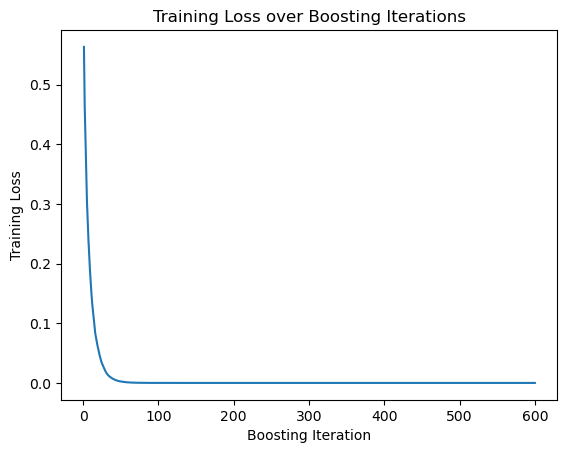

In [54]:
k = 600
outputs = LOGITBOOST(K = k,Y_train = Y_train,Y_test = Y_test)
Loss = outputs[4]
plt.plot(np.arange(1, k + 1, 1), Loss)
plt.xlabel("Boosting Iteration")
plt.ylabel("Training Loss")
plt.title("Training Loss over Boosting Iterations")
plt.show()

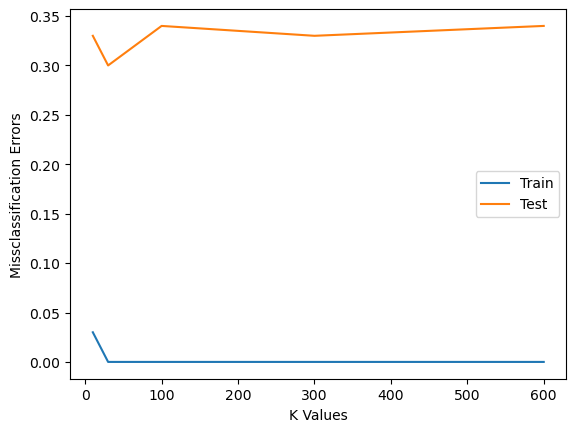

,K_Values,Missclassification Error Train,Missclassification Error Test
0,10,0.03,0.33
1,30,0.00,0.30
2,100,0.00,0.34
3,300,0.00,0.33
4,600,0.00,0.34


In [62]:
K_vals = [10,30,100,300,600]

miss_train = []
miss_test = []
for k in K_vals:
    outputs = LOGITBOOST(K = k,Y_train = Y_train,Y_test = Y_test)
    miss_tr = outputs[0]
    miss_ts = outputs[1]
    miss_train.append(miss_tr)
    miss_test.append(miss_ts)

#Plotting the errors

plt.plot(K_vals,miss_train,label = 'Train')
plt.plot(K_vals,miss_test,label = 'Test')
plt.xlabel('K Values')
plt.ylabel('Missclassification Errors')
plt.legend()
plt.show()
#Creating the table

table = pd.DataFrame({'K_Values':K_vals,'Missclassification Error Train':miss_train,
                      'Missclassification Error Test':miss_test})
table    

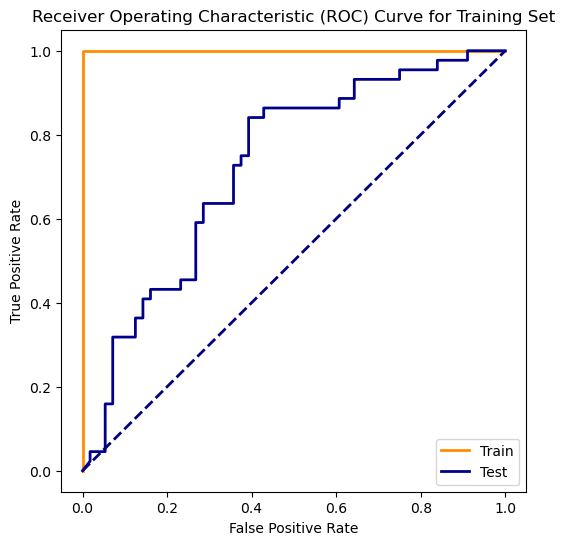

In [72]:
#ROC Curves for K = 300
outputs = LOGITBOOST(K = 300,Y_train = Y_train,Y_test = Y_test)
fpr1, tpr1, thresholds1 = roc_curve(Y_train.reshape(-1,1), (outputs[2]).reshape(-1,1))
fpr2, tpr2, thresholds2 = roc_curve(Y_test.reshape(-1,1), (outputs[3]).reshape(-1,1))
plt.figure(figsize=(6, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2,label = 'Train')
plt.plot(fpr2, tpr2, color='darkblue', lw=2,label = 'Test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
plt.show()

In [197]:
# data_train = pd.read_csv('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_train.csv',header = None)
# data_train.shape
# data_train_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_train.labels')
# data_test = pd.read_csv('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_valid.csv',header = None)
# data_test_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_valid.labels')
# data_train.shape,data_train_labels.shape,data_test.shape,data_test_labels.shape

# data_train_labels = np.where(data_train_labels == -1,0,1)
# data_test_labels = np.where(data_test_labels == -1,0,1)

In [198]:
# sds = np.std(data_train,axis = 0)
# sds
# place = np.where(sds == 0)

In [199]:
# place = place[0].tolist()

In [200]:
# data_train = data_train.drop(place,axis = 1)

In [201]:
# data_train = np.array(data_train)
# # X_ones_train =np.ones((data_train.shape[0], 1))
# X_train = np.hstack((X_ones_train, data_train))



In [ ]:
# N = data_train.shape[0]
# h_x = np.zeros((N))
# K = 5
# B = np.zeros((K, 2))
# Beta = np.zeros((X_train.shape[1],1))
# training_loss = []
# t_loss = []
# Y_train  = Y_train.reshape(-1)
# Y_i = (2*Y_train - 1).reshape(-1)

# for k in range(K):
#     P = sigmoid(h_x)
#     W = P * (1 - P)
#     W = W.reshape(-1)
#     Z = np.where(Y_train == 1,1/P,-1/(1-P))
#     Z = np.clip(Z, -4, 4)
#     Z = Z.reshape(-1)
    
#     Loss = []
#     H_temp = np.zeros((N, data_train.shape[1]))
#     betas1 = []
#     betas0 = []
    

#     for i in range(data_train.shape[1]):
#         X = data_train[:, i].reshape(-1)
#         X_bar = np.sum(X*W) / np.sum(W)
#         Z_bar = np.sum(W * Z) / np.sum(W)
#         b1 = np.sum((X - X_bar)*W * (Z - Z_bar)) / np.sum(((X - X_bar) ** 2)*W)
#         betas1.append(b1)
#         b0 = Z_bar - b1 * X_bar
#         betas0.append(b0)
#         #vect = np.array([b0,b1]).reshape(-1,1)
#         H_temp[:, i] = h_x.reshape(-1) + (b0 + b1*X).reshape(-1) #a matrix of order Nx1
#         ls = np.mean(np.log(1 + np.exp(-(H_temp[:, i]*Y_i))))
#         Loss.append(ls)
    

#     idx = np.argmin(Loss)
#     print("Selected Feature Index:", idx)
    
#     beta0_optimal = betas0[idx]
#     beta1_optimal = betas1[idx]
    
#     print("Optimal Beta0:", beta0_optimal)
#     print("Optimal Beta1:", beta1_optimal)
    
#     Beta[0]+= beta0_optimal
#     Beta[idx+1]+= beta1_optimal
#     B[k,0] = beta0_optimal
#     B[k,1] = beta1_optimal
#     #h_x = h_x + (X_train[:,[0,idx]]@B[k,:]).reshape(-1,1)
#     h_x = h_x + (beta0_optimal + beta1_optimal*X_train[:,idx+1]).reshape(-1)
#     t_loss.append(Loss[idx])
#     logit_loss = np.mean(np.log(1 + np.exp(-(Y_i * h_x))))
#     print(logit_loss)
#     training_loss.append(logit_loss)
#     feature_selected = len(np.where(Beta != 0)[0])

# plt.plot(np.arange(1, K + 1, 1), training_loss)
# plt.xlabel("Boosting Iteration")
# plt.ylabel("Training Loss")
# plt.title("Training Loss over Boosting Iterations")
# plt.show()

### Q1 b).Dataset Dexter

In [10]:
data_train = pd.read_csv('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_train.csv',header = None)
data_train.shape
data_train_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_train.labels')
data_test = pd.read_csv('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_valid.csv',header = None)
data_test_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_valid.labels')
data_train.shape,data_train_labels.shape,data_test.shape,data_test_labels.shape

data_train_labels = np.where(data_train_labels == -1,0,1)
data_test_labels = np.where(data_test_labels == -1,0,1)

In [11]:
std_devs = np.std(data_train,axis = 0)
std_devs
zero_vals = np.where(std_devs == 0)
zero_vals = zero_vals[0].tolist()
zero_vals

#Taking those data_train,data_test

data_train = data_train.drop(zero_vals,axis = 1)
data_test = data_test.drop(zero_vals,axis = 1)

data_train = np.array(data_train)
X_ones_train =np.ones((data_train.shape[0], 1))
X_train = np.hstack((X_ones_train, data_train))

data_test = np.array(data_test)
X_ones_test =np.ones((data_test.shape[0], 1))
X_test = np.hstack((X_ones_test, data_test))

print(data_train.shape)
print(X_train.shape)
print(data_test.shape)
print(X_test.shape)

Y_train = data_train_labels
Y_test = data_test_labels
print(Y_train.shape)
print(Y_test.shape)

(300, 7751)
(300, 7752)
(300, 7751)
(300, 7752)
(300,)
(300,)


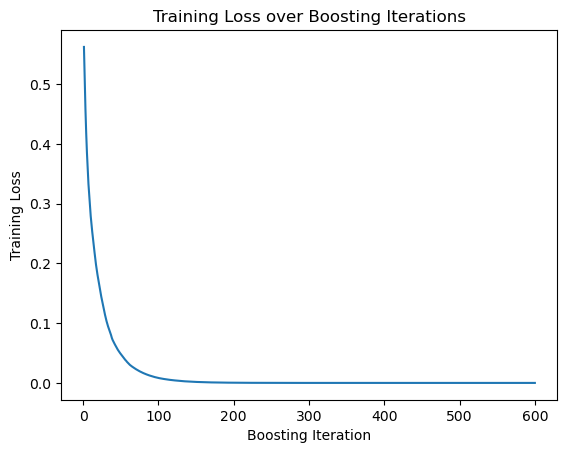

In [12]:
k = 600
outputs = LOGITBOOST(K = k,Y_train = Y_train,Y_test = Y_test)
Loss = outputs[4]
plt.plot(np.arange(1, k + 1, 1), Loss)
plt.xlabel("Boosting Iteration")
plt.ylabel("Training Loss")
plt.title("Training Loss over Boosting Iterations")
plt.show()

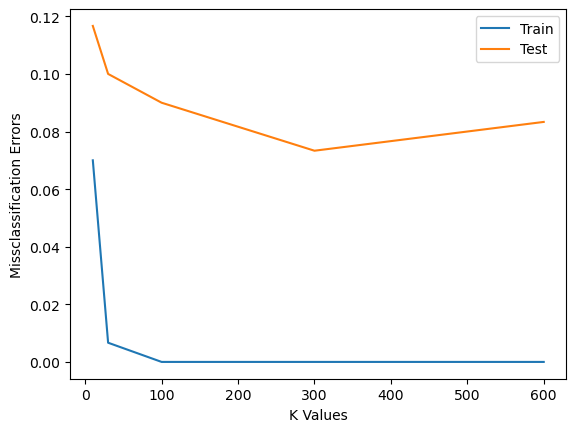

,K_Values,Missclassification Error Train,Missclassification Error Test
0,10,0.070000,0.116667
1,30,0.006667,0.100000
2,100,0.000000,0.090000
3,300,0.000000,0.073333
4,600,0.000000,0.083333


In [14]:
K_vals = [10,30,100,300,600]

miss_train = []
miss_test = []
for k in K_vals:
    outputs = LOGITBOOST(K = k,Y_train = Y_train,Y_test = Y_test)
    miss_tr = outputs[0]
    miss_ts = outputs[1]
    miss_train.append(miss_tr)
    miss_test.append(miss_ts)

#Plotting the errors

plt.plot(K_vals,miss_train,label = 'Train')
plt.plot(K_vals,miss_test,label = 'Test')
plt.xlabel('K Values')
plt.ylabel('Missclassification Errors')
plt.legend()
plt.show()
#Creating the table

table = pd.DataFrame({'K_Values':K_vals,'Missclassification Error Train':miss_train,
                      'Missclassification Error Test':miss_test})
table    

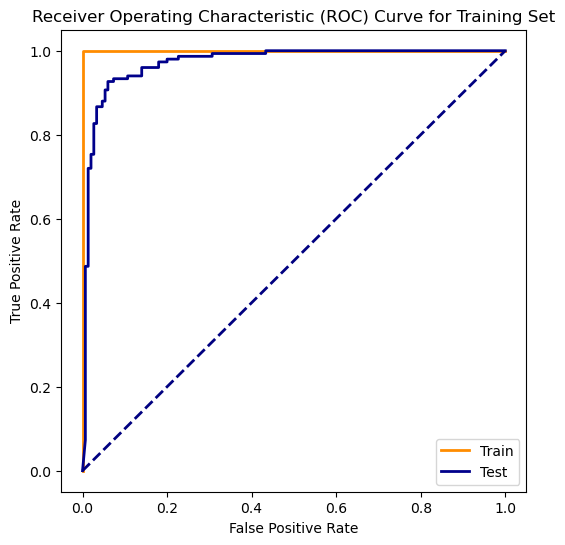

In [13]:
#ROC Curves for K = 300
k = 300
outputs = LOGITBOOST(K = k,Y_train = Y_train,Y_test = Y_test)
fpr1, tpr1, thresholds1 = roc_curve(Y_train.reshape(-1,1), outputs[2])
fpr2, tpr2, thresholds2 = roc_curve(Y_test.reshape(-1,1), outputs[3])
plt.figure(figsize=(6, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2,label = 'Train')#, label=f'AUC = {roc_auc:.2f}'
plt.plot(fpr2, tpr2, color='darkblue', lw=2,label = 'Test')#, label=f'AUC = {roc_auc:.2f}'
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
plt.show()

### Q1 c).Dataset Gisette

In [25]:
data_train = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_train.data')
data_train.shape
data_train_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_train_labels.labels')

data_test = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_valid.data')
data_test_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_valid_labels.labels')

print(data_train.shape,data_train_labels.shape,data_test.shape,data_test_labels.shape)

data_train_labels = np.where(data_train_labels == -1,0,1)
data_test_labels = np.where(data_test_labels == -1,0,1)

data_train = pd.DataFrame(data_train)
data_test = pd.DataFrame(data_test)

(6000, 5000) (6000,) (1000, 5000) (1000,)


In [26]:
std_devs = np.std(data_train,axis = 0)
std_devs
zero_vals = np.where(std_devs == 0)
zero_vals = zero_vals[0].tolist()
zero_vals

#Taking those data_train,data_test

data_train = data_train.drop(zero_vals,axis = 1)
data_test = data_test.drop(zero_vals,axis = 1)

data_train = np.array(data_train)
X_ones_train =np.ones((data_train.shape[0], 1))
X_train = np.hstack((X_ones_train, data_train))

data_test = np.array(data_test)
X_ones_test =np.ones((data_test.shape[0], 1))
X_test = np.hstack((X_ones_test, data_test))

print(data_train.shape)
print(X_train.shape)
print(data_test.shape)
print(X_test.shape)

Y_train = data_train_labels
Y_test = data_test_labels
print(Y_train.shape)
print(Y_test.shape)

(6000, 4955)
(6000, 4956)
(1000, 4955)
(1000, 4956)
(6000,)
(1000,)


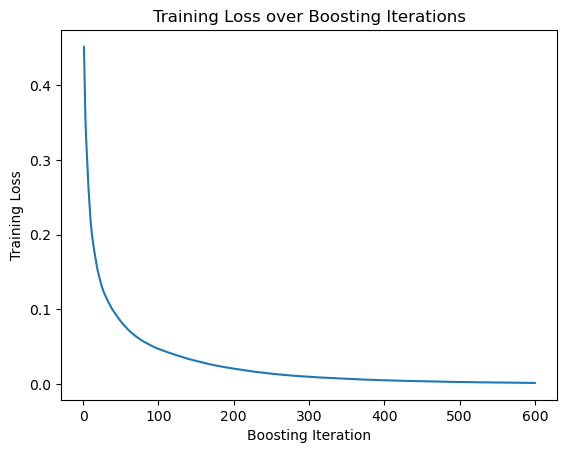

In [27]:
k = 600
outputs = LOGITBOOST(K = k,Y_train = Y_train,Y_test = Y_test)
Loss = outputs[4]
plt.plot(np.arange(1, k + 1, 1), Loss)
plt.xlabel("Boosting Iteration")
plt.ylabel("Training Loss")
plt.title("Training Loss over Boosting Iterations")
plt.show()

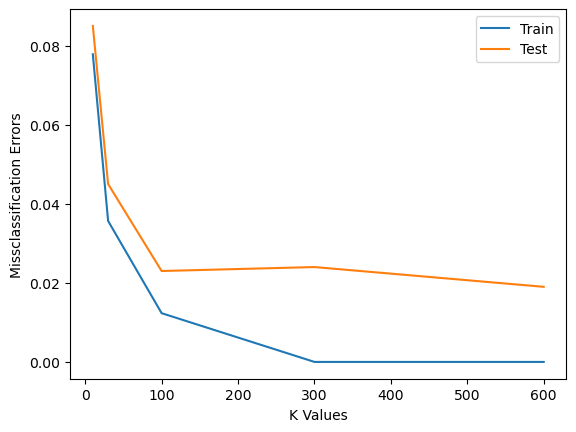

,K_Values,Missclassification Error Train,Missclassification Error Test
0,10,0.077833,0.085
1,30,0.035667,0.045
2,100,0.012333,0.023
3,300,0.000000,0.024
4,600,0.000000,0.019


In [29]:
K_vals = [10,30,100,300,600]

miss_train = []
miss_test = []
for k in K_vals:
    outputs = LOGITBOOST(K = k,Y_train = Y_train,Y_test = Y_test)
    miss_tr = outputs[0]
    miss_ts = outputs[1]
    miss_train.append(miss_tr)
    miss_test.append(miss_ts)

#Plotting the errors

plt.plot(K_vals,miss_train,label = 'Train')
plt.plot(K_vals,miss_test,label = 'Test')
plt.xlabel('K Values')
plt.ylabel('Missclassification Errors')
plt.legend()
plt.show()
#Creating the table

table = pd.DataFrame({'K_Values':K_vals,'Missclassification Error Train':miss_train,
                      'Missclassification Error Test':miss_test})
table    

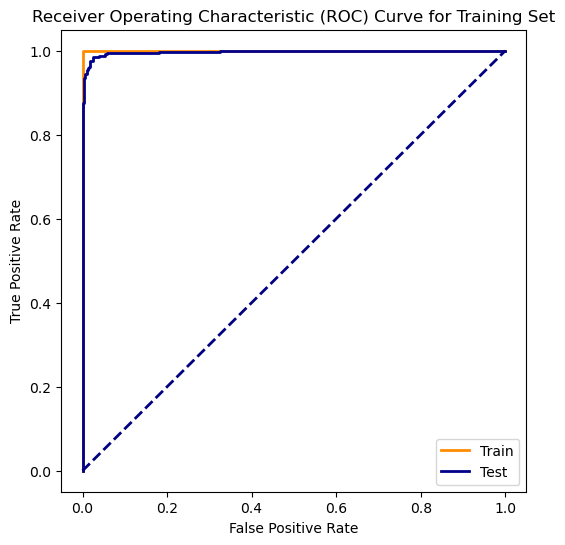

In [28]:
#ROC Curves for K = 300
k = 300
outputs = LOGITBOOST(K = k,Y_train = Y_train,Y_test = Y_test)
fpr1, tpr1, thresholds1 = roc_curve(Y_train.reshape(-1,1), outputs[2])
fpr2, tpr2, thresholds2 = roc_curve(Y_test.reshape(-1,1), outputs[3])
plt.figure(figsize=(6, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2,label = 'Train')#, label=f'AUC = {roc_auc:.2f}'
plt.plot(fpr2, tpr2, color='darkblue', lw=2,label = 'Test')#, label=f'AUC = {roc_auc:.2f}'
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
plt.show()